## Introduction to Machine Learning

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [4]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")
data.head()

,Unnamed: 0,SalePrice,Gr Liv Area,Bedroom AbvGr,Neighborhood_NAmes,Neighborhood_NWAmes
0,1,105000,896,2,True,False
1,2,172000,1329,3,True,False
2,3,244000,2110,3,True,False
3,19,210000,2073,3,False,True
4,20,190000,1844,3,False,True


In [5]:
y = data['SalePrice']
X = data[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [67]:
len(X_train), len(X_test), len(y_train), len(y_test)

(74, 25, 74, 25)

In [58]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [27]:
lr_fit.coef_

array([    84.59623186, -15568.53789148,  -2351.7764099 ,   2351.7764099 ])

In [50]:
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)

In [80]:
df = pd.DataFrame({"y_test": y_test, "y_predd_knn": y_pred_knn, "y_pred_lr": y_pred_lr, "y_pred_dt": y_pred_dt})

,y_test,y_predd_knn,y_pred_lr,y_pred_dt
78,187500,140800.0,170118.182579,214000.0
15,212500,177900.0,202055.070551,190000.0
68,124500,116500.0,121597.119295,126000.0
75,154000,187400.0,212719.641040,218500.0
30,172500,173100.0,171515.859965,159500.0
23,178900,156200.0,168009.662240,153000.0
60,132000,138547.6,146210.258994,128950.0
17,197500,151500.0,163182.008819,152000.0
31,128000,133300.0,133938.566957,135000.0
33,132000,150940.0,151018.691508,167500.0


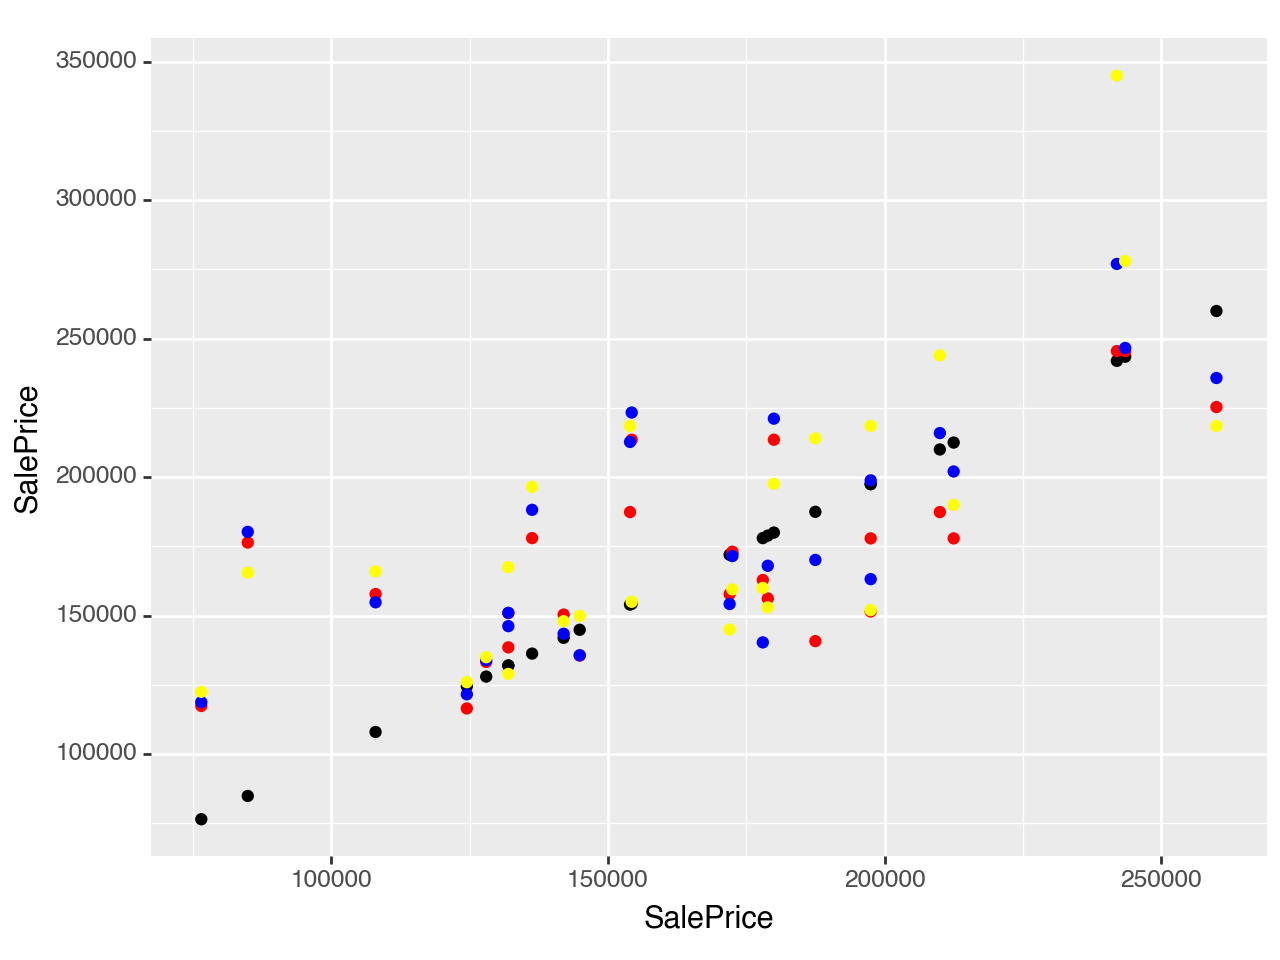

<Figure Size: (640 x 480)>

In [95]:
from plotnine import ggplot, aes, geom_line, geom_point, scale_color_manual
(ggplot(aes(x = y_test)) + 
    geom_point(aes(y = y_test), color = "black") +
    geom_point(aes(y = y_pred_knn), color = "red") +
    geom_point(aes(y = y_pred_lr), color = "blue") +
    geom_point(aes(y = y_pred_dt), color = "yellow")
)

In [52]:
from sklearn.metrics import mean_squared_error

mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"knn: {mse_knn} \nlr: {mse_lr} \ndt: {mse_dt}")
min(mse_knn, mse_lr, mse_dt)

knn: 1168593523.6304002 
lr: 1266662633.2600677 
dt: 1669710500.0


1168593523.6304002

In [66]:
final_model = lr.fit(X, y)
final_model.coef_

array([    74.37717581, -13083.50151923,  -7484.17760684,   7484.17760684])